In [8]:
import numpy as np
import pandas as pd
import torch
import joblib
import h5py
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings; warnings.filterwarnings('ignore')

In [3]:
with h5py.File('./data/ecg_tracings.hdf5', "r") as f:
    X = np.array(f['tracings'])
X

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.43425145,  0.00380549,  0.43805694, ...,  

In [4]:
X.shape

(827, 4096, 12)

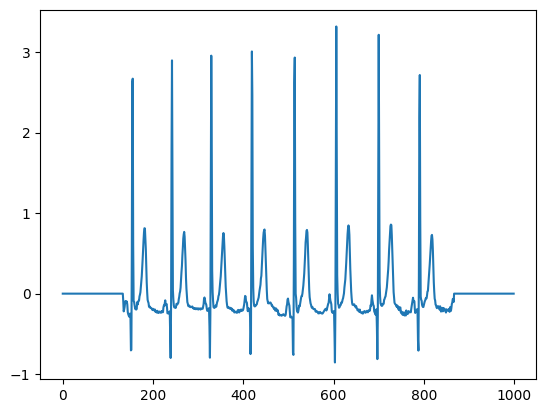

In [5]:
# 4x downsample, then crop out 12 points on axis 1, both sides

X_down = X[:, ::4, :]
X_down = X_down[:, 12:-12, :]
assert X_down.shape == (827, 1000, 12)
plt.plot(X_down[0,:,0])

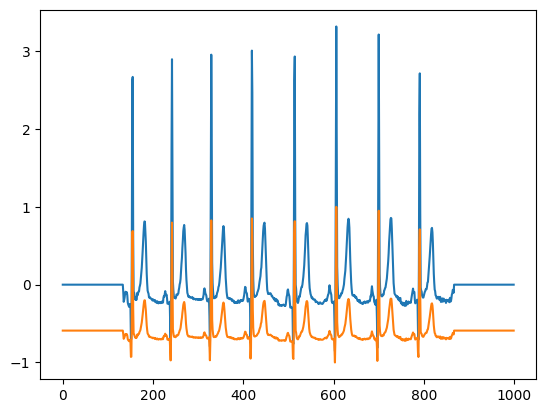

In [6]:
### Do later if results are not good
scaler = MinMaxScaler((-1, 1))

x = X_down[0,:,:]
x_ = scaler.fit_transform(x)

plt.plot(X_down[0,:,0]) # original
plt.plot(x_[:, 0]) # scaled

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 827/827 [00:00<00:00, 2039.93it/s]


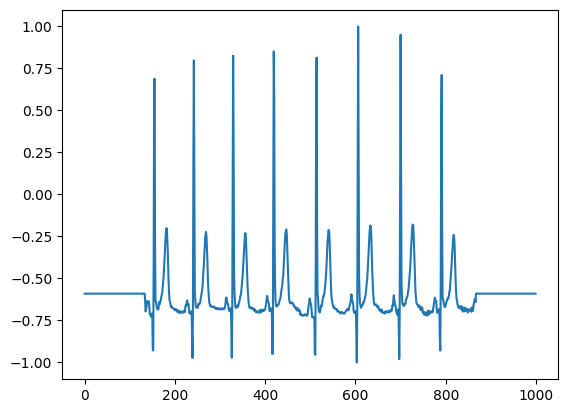

In [9]:
scaler = MinMaxScaler((-1, 1))

for i in tqdm(range(X_down.shape[0])):
    X_down[i, :, :] = scaler.fit_transform(X_down[i, :, :])

plt.plot(X_down[0,:,0])

In [11]:
y = pd.read_csv('./data/annotations/gold_standard.csv')
y.shape

(827, 6)

In [12]:
y['NORM'] = y.apply(
    lambda row: 1 if row[['1dAVb', 'RBBB', 'LBBB', 'SB', 'AF', 'ST']].sum() == 0 else 0,
    axis = 1
)

In [13]:
y = y[['NORM', '1dAVb', 'RBBB', 'LBBB', 'SB', 'AF', 'ST']] # rearrange column
y

,NORM,1dAVb,RBBB,LBBB,SB,AF,ST
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
822,1,0,0,0,0,0,0
823,1,0,0,0,0,0,0
824,1,0,0,0,0,0,0
825,1,0,0,0,0,0,0


In [17]:
(y.sum(axis=0)/len(y)).values

array([0.82345828, 0.03385732, 0.04111245, 0.0362757 , 0.01934704,
       0.01571947, 0.04474002])

In [18]:
CLASSES = ['NORM', '1dAVb', 'RBBB', 'LBBB', 'SB', 'AF', 'ST']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_down, y, test_size=0.33, random_state=1)

assert X_train.shape[1] == 1000
y_train = y_train.values
y_test = y_test.values

In [20]:
joblib.dump(X_train, './data/X_train.joblib')
joblib.dump(y_train, './data/y_train.joblib')
joblib.dump(X_test, './data/X_test.joblib')
joblib.dump(y_test, './data/y_test.joblib')

['./data/y_test.joblib']